In [2]:
## coloque os outros códigos antes...

# https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive')
!pip install pandas
!pip install numpy
!pip install matplotlib==3.5.3
!pip install docxtpl
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Cm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
planilha = pd.read_excel("/content/drive/My Drive/CNJ-mortes/df_final_ajust.xlsx")

In [4]:
indexes_para_remover = []
for idx in planilha.index:
  if planilha.iloc[idx]["5 - É caso de interesse?"] != "sim: morte interna" and planilha.iloc[idx]["5 - É caso de interesse?"] != "sim: morte externa":
    indexes_para_remover.append(idx)

planilha_filtrada = planilha.drop(labels=indexes_para_remover)

In [5]:
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')
   


In [6]:
variavel = '29 - Renda (coloque apenas o valor em números. Ex: 1.275,50 ou "SI" para casos sem informação'
arr_renda = []

"""
58 30 reais a diaria
60 800,00 por mes
65 1300,00 por mes
73 50,00 por dia de trabalho
93 60/diaria
95 menos de 1 salario minimo
1258 80,00 (diaria de terca e quinta)
1735 1.500,00; 2.000
1740 120,00/dia
1790 2.500,00; 998,00 (inss)
2070 salario minimo
2400 ate 2 salarios minimos
2454 ate um salario minimo
2584 800 euros
2926 300,00 por dia (comercializar drogas)
"""
planilha_filtrada.at[58, variavel] = 30*30
planilha_filtrada.at[60, variavel] = 800
planilha_filtrada.at[65, variavel] = 1300
planilha_filtrada.at[73, variavel] = 50*30
planilha_filtrada.at[93, variavel] = 60*30
planilha_filtrada.at[95, variavel] = 1045 # morte 2020
planilha_filtrada.at[1258, variavel] = 160*4
planilha_filtrada.at[1735, variavel] = 3500 # [2500, 998] --- devo somar?
planilha_filtrada.at[1740, variavel] = 120*30
planilha_filtrada.at[1790, variavel] = 3498
planilha_filtrada.at[2070, variavel] = 998 # morte 2019
planilha_filtrada.at[2400, variavel] = 2*998	# morte 2019
planilha_filtrada.at[2454, variavel] = 937 # morte 2017
planilha_filtrada.at[2584, variavel] = 800*4.48 # morte 2019/10/24 --- https://br.investing.com/currencies/eur-brl-historical-data
planilha_filtrada.at[2926, variavel] = 300*30

for idx in planilha_filtrada.index:
  line = planilha_filtrada.at[idx, variavel]

  if pd.isnull(line):
    arr_renda.append(0)
    continue
  
  if type(line)==int or type(line)==float:
    arr_renda.append(line)
    continue
  
  line = strip_accents(line).lower().strip()
  if line == "si":
    arr_renda.append(0)
    continue
  
  if line == "nsa":
    arr_renda.append(0)
    continue
  
  # print(idx, line)
# print(arr_renda)
planilha_filtrada['Renda Tratada'] = arr_renda
# for l in planilha_filtrada['Renda Tratada']:
  # print(l)

In [7]:
import re


variavel = '35 - Tempo de pena - em caso de condenação (no processo analisado) - por favor coloque no padrão (X anos, y meses e z dias + Multa) e se houver mais de uma, separar por ponto e vírgula ";"'
arr_tempo_pena_sentenca = []

planilha_filtrada.at[46, variavel] = "7 anos, 6 meses +15 dias-multa"
planilha_filtrada.at[830, variavel] = "2 anos +10 dias-multa"
planilha_filtrada.at[1288, variavel] = None
planilha_filtrada.at[1296, variavel] = None
planilha_filtrada.at[2071, variavel] = "26 anos e 8 meses de reclusão + 580 dias-multa"
planilha_filtrada.at[2107, variavel] = "3 anos e 4 meses + 34 dias-multa"
planilha_filtrada.at[2310, variavel] = "1 ano e 9 meses + 190 dias-multa (acódão)."
planilha_filtrada.at[2507, variavel] = "6 anos e 6 meses + multa"
planilha_filtrada.at[2637, variavel] = "3 anos, 6 meses e 5 dias +159 dias-multa"
planilha_filtrada.at[2644, variavel] = "5 anos, 6 meses e 20 dias + 30 dias-multa"
planilha_filtrada.at[2781, variavel] = "15 anos, 10 meses e 29 dias"
planilha_filtrada.at[2925, variavel] = None
planilha_filtrada.at[3001, variavel] = None
planilha_filtrada.at[3005, variavel] = "3 anos, 6 meses e 20 dias + 9 dias-multa"
planilha_filtrada.at[3513, variavel] = None
planilha_filtrada.at[3608, variavel] = "7 anos, 3 meses, 3 dias + 437,00"
planilha_filtrada.at[3610, variavel] = "2 anos, 11 meses, 0 dias + 11 dias-multa"
planilha_filtrada.at[3611, variavel] = "2 anos, 10 dias-multa" 
planilha_filtrada.at[3614, variavel] = "6 meses e 10 dias-multa"
planilha_filtrada.at[3620, variavel] = "1 mês"
planilha_filtrada.at[3633, variavel] = "2 anos"
planilha_filtrada.at[3656, variavel] = "29 anos, 4 meses + 26 dias-multa a 1/30"
planilha_filtrada.at[3671, variavel] = "5 anos + 500 dias-multa"
planilha_filtrada.at[3682, variavel] = "NSA"
planilha_filtrada.at[3696, variavel] = "2 anos, 7 meses e 5 dias + 20 dias-multa no minimo"
planilha_filtrada.at[3717, variavel] = "8 anos, 6 meses + 520 dias-multa"
planilha_filtrada.at[3818, variavel] = "4 anos + 1 ano e 10 meses de detencao + 36 dias-multa"

for idx in planilha_filtrada[variavel].index:
  line = planilha_filtrada.at[idx, variavel]
  if pd.isnull(line):
    arr_tempo_pena_sentenca.append(None)
    continue
  elif str(line).lower() == "si" or str(line).lower() == "nsa":
    arr_tempo_pena_sentenca.append(None)
    continue
  
  line = strip_accents(line.lower())
  # print(idx, line, end=" ")
  ultima_pos = 0
  ano = mes = dia = dia_multa = 0
  if ";" not in line:
    if "ano" in line:
      indices_ano = [i for i in range(len(line)) if line.startswith("ano", i)]
      if len(indices_ano) > 1:
        for indice in indices_ano:
          pos_ano = line.find("ano", indice)
          ano_aux = re.sub('\D', '', line[ultima_pos:pos_ano])
          if ano_aux != '':
            ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
          ultima_pos = pos_ano
          # print(ano, end=" ")
      else:
        pos_ano = line.find("ano")
        ano_aux = re.sub('\D', '', line[ultima_pos:pos_ano])
        if ano_aux != '':
          ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
        ultima_pos = pos_ano
        # print(ano, end=" ")
    
    if "mes" in line:
      indices_mes = [i for i in range(len(line)) if line.startswith("mes", i)]
      if len(indices_mes) > 1:
        for indice in indices_mes:
          pos_mes = line.find("mes", indice)
          mes_aux = re.sub('\D', '', line[ultima_pos:pos_mes])
          if mes_aux != '':
            mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
          ultima_pos = pos_mes
          # print(mes, end=" ")
      else:
        pos_mes = line.find("mes")
        mes_aux = re.sub('\D', '', line[ultima_pos:pos_mes])
        if mes_aux != '':
          mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
        ultima_pos = pos_mes
        # print(mes, end=" ")
      
    if "dia" in line:
      indices_dia = [i for i in range(len(line)) if line.startswith("dia", i)]
      if len(indices_dia) > 1:
        for idx_indice in range(len(indices_dia)):
          pos_atual = indices_dia[idx_indice]
          if idx_indice < len(indices_dia)-1:
            pos_prox = indices_dia[idx_indice]+1
            if "-multa" not in line[pos_atual:pos_prox]:
              pos_dia = line.find("dia", pos_atual)
              dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
              if dia_aux != '':
                dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
              ultima_pos = pos_dia
            else:
              pos_dia_multa = line.find("dia", pos_atual)
              dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
              if dia_multa_aux != '':
                dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
              ultima_pos = pos_dia_multa
          else:
            if "-multa" not in line:
              pos_dia = line.find("dia", pos_atual)
              dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
              if dia_aux != '':
                dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
              ultima_pos = pos_dia
            else:
              pos_dia_multa = line.find("dia", pos_atual)
              dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
              if dia_multa_aux != '':
                dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
              ultima_pos = pos_dia_multa
      else:
        if "-multa" not in line:
          pos_dia = line.find("dia")
          dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
          if dia_aux != '':
            dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
          ultima_pos = pos_dia
        else:
          pos_dia_multa = line.find("dia")
          dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
          if dia_multa_aux != '':
            dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
          ultima_pos = pos_dia_multa

      # print(dia, dia_multa)
    arr_tempo_pena_sentenca.append((ano, mes, dia))
  else:
    arr_aux = []
    line_splited = [p.strip() for p in line.split(";")]
    for line_ in line_splited:
      ultima_pos = 0
      ano = mes = dia = dia_multa = 0
      if "ano" in line_:
        indices_ano = [i for i in range(len(line_)) if line_.startswith("ano", i)]
        if len(indices_ano) > 1:
          for indice in indices_ano:
            pos_ano = line_.find("ano", indice)
            ano_aux = re.sub('\D', '', line_[ultima_pos:pos_ano])
            if ano_aux != '':
              ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
            ultima_pos = pos_ano
            # print(ano, end=" ")
        else:
          pos_ano = line_.find("ano")
          ano_aux = re.sub('\D', '', line_[ultima_pos:pos_ano])
          if ano_aux != '':
            ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
          ultima_pos = pos_ano
          # print(ano, end=" ")
      
      if "mes" in line_:
        indices_mes = [i for i in range(len(line_)) if line_.startswith("mes", i)]
        if len(indices_mes) > 1:
          for indice in indices_mes:
            pos_mes = line_.find("mes", indice)
            mes_aux = re.sub('\D', '', line_[ultima_pos:pos_mes])
            if mes_aux != '':
              mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
            ultima_pos = pos_mes
            # print(mes, end=" ")
        else:
          pos_mes = line_.find("mes")
          mes_aux = re.sub('\D', '', line_[ultima_pos:pos_mes])
          if mes_aux != '':
            mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
          ultima_pos = pos_mes
          # print(mes, end=" ")
        
      if "dia" in line_:
        indices_dia = [i for i in range(len(line_)) if line_.startswith("dia", i)]
        if len(indices_dia) > 1:
          for idx_indice in range(len(indices_dia)):
            pos_atual = indices_dia[idx_indice]
            if idx_indice < len(indices_dia)-1:
              pos_prox = indices_dia[idx_indice]+1
              if "-multa" not in line_[pos_atual:pos_prox]:
                pos_dia = line_.find("dia", pos_atual)
                dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
                if dia_aux != '':
                  dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
                ultima_pos = pos_dia
              else:
                pos_dia_multa = line_.find("dia", pos_atual)
                dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
                if dia_multa_aux != '':
                  dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
                ultima_pos = pos_dia_multa
            else:
              if "-multa" not in line_:
                pos_dia = line_.find("dia", pos_atual)
                dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
                if dia_aux != '':
                  dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
                ultima_pos = pos_dia
              else:
                pos_dia_multa = line_.find("dia", pos_atual)
                dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
                if dia_multa_aux != '':
                  dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
                ultima_pos = pos_dia_multa
        else:
          if "-multa" not in line_:
            pos_dia = line_.find("dia")
            dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
            if dia_aux != '':
              dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
            ultima_pos = pos_dia
          else:
            pos_dia_multa = line_.find("dia")
            dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
            if dia_multa_aux != '':
              dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
            ultima_pos = pos_dia_multa
        # print(dia, dia_multa)
      arr_aux.append((ano, mes, dia))
    arr_tempo_pena_sentenca.append(arr_aux)
  # print(arr_tempo_pena_sentenca[-1])

  # print()
# problemas = [2002, 2241, 2937, 3471, 3566, 3568, 3569, 3572, 3578, 3591, 3640]
# for j in problemas:
  # print(j, planilha_filtrada.at[j, variavel])

arr_tempo_pena_sentenca_dias = []
for arr in arr_tempo_pena_sentenca:
  if arr is None:
    arr_tempo_pena_sentenca_dias.append(None)
    continue

  if type(arr)==tuple:
    anos_p_dias = arr[0]*365
    mes_p_dias = arr[1]*30
    arr_tempo_pena_sentenca_dias.append(anos_p_dias+mes_p_dias+arr[2])
  else:
    arr_aux = []
    for arr_i in arr:
      anos_p_dias = arr_i[0]*365
      mes_p_dias = arr_i[1]*30
      arr_aux.append(anos_p_dias+mes_p_dias+arr_i[2])
    arr_tempo_pena_sentenca_dias.append(np.nansum(arr_aux))
planilha_filtrada["Tempo de pena da sentença (em dias)"] = arr_tempo_pena_sentenca_dias
# print(planilha_filtrada.at[3057,"Tempo de pena da sentença (em dias)"])


In [8]:
import re


variavel = '36 - Caso haja condenação em outros processos, qual o tempo de condenação total? (se não houver colocar "NSA" para não se aplica ou "SI" se houver outro processo, mas não temos essa informação)'
variavel_aux = 'Tempo de pena da sentença (em dias)'
arr_tempo_total_pena = []

planilha_filtrada[2402, variavel] = None
planilha_filtrada[2753, variavel] = None
planilha_filtrada[3393, variavel] = None

for idx in planilha_filtrada[variavel].index:
  line = planilha_filtrada.at[idx, variavel]
  if pd.isnull(line):
    arr_tempo_total_pena.append(None)
    continue
  elif str(line).lower().strip() == "nsa":
    arr_tempo_total_pena.append(None)
    continue
  elif str(line).lower().strip() == "si":
    if planilha_filtrada.at[idx, variavel_aux] is not None:
      arr_tempo_total_pena.append(planilha_filtrada.at[idx, variavel_aux])
    else:
      arr_tempo_total_pena.append(None)
    continue
  
  line = strip_accents(line.lower())
  # print(idx, line, end=" ")
  ultima_pos = 0
  ano = mes = dia = dia_multa = 0
  if ";" not in line:
    if "ano" in line:
      indices_ano = [i for i in range(len(line)) if line.startswith("ano", i)]
      if len(indices_ano) > 1:
        for indice in indices_ano:
          pos_ano = line.find("ano", indice)
          ano_aux = re.sub('\D', '', line[ultima_pos:pos_ano])
          if ano_aux != '':
            ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
          ultima_pos = pos_ano
          # print(ano, end=" ")
      else:
        pos_ano = line.find("ano")
        ano_aux = re.sub('\D', '', line[ultima_pos:pos_ano])
        if ano_aux != '':
          ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
        ultima_pos = pos_ano
        # print(ano, end=" ")
    
    if "mes" in line:
      indices_mes = [i for i in range(len(line)) if line.startswith("mes", i)]
      if len(indices_mes) > 1:
        for indice in indices_mes:
          pos_mes = line.find("mes", indice)
          mes_aux = re.sub('\D', '', line[ultima_pos:pos_mes])
          if mes_aux != '':
            mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
          ultima_pos = pos_mes
          # print(mes, end=" ")
      else:
        pos_mes = line.find("mes")
        mes_aux = re.sub('\D', '', line[ultima_pos:pos_mes])
        if mes_aux != '':
          mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
        ultima_pos = pos_mes
        # print(mes, end=" ")
      
    if "dia" in line:
      indices_dia = [i for i in range(len(line)) if line.startswith("dia", i)]
      if len(indices_dia) > 1:
        for idx_indice in range(len(indices_dia)):
          pos_atual = indices_dia[idx_indice]
          if idx_indice < len(indices_dia)-1:
            pos_prox = indices_dia[idx_indice]+1
            if "-multa" not in line[pos_atual:pos_prox]:
              pos_dia = line.find("dia", pos_atual)
              dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
              if dia_aux != '':
                dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
              ultima_pos = pos_dia
            else:
              pos_dia_multa = line.find("dia", pos_atual)
              dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
              if dia_multa_aux != '':
                dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
              ultima_pos = pos_dia_multa
          else:
            if "-multa" not in line:
              pos_dia = line.find("dia", pos_atual)
              dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
              if dia_aux != '':
                dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
              ultima_pos = pos_dia
            else:
              pos_dia_multa = line.find("dia", pos_atual)
              dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
              if dia_multa_aux != '':
                dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
              ultima_pos = pos_dia_multa
      else:
        if "-multa" not in line:
          pos_dia = line.find("dia")
          dia_aux = re.sub('\D', '', line[ultima_pos:pos_dia])
          if dia_aux != '':
            dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
          ultima_pos = pos_dia
        else:
          pos_dia_multa = line.find("dia")
          dia_multa_aux = re.sub('\D', '', line[ultima_pos:pos_dia_multa])
          if dia_multa_aux != '':
            dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
          ultima_pos = pos_dia_multa

      # print(dia, dia_multa)
    arr_tempo_total_pena.append((ano, mes, dia))
  else:
    arr_aux = []
    line_splited = [p.strip() for p in line.split(";")]
    for line_ in line_splited:
      ultima_pos = 0
      ano = mes = dia = dia_multa = 0
      if "ano" in line_:
        indices_ano = [i for i in range(len(line_)) if line_.startswith("ano", i)]
        if len(indices_ano) > 1:
          for indice in indices_ano:
            pos_ano = line_.find("ano", indice)
            ano_aux = re.sub('\D', '', line_[ultima_pos:pos_ano])
            if ano_aux != '':
              ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
            ultima_pos = pos_ano
            # print(ano, end=" ")
        else:
          pos_ano = line_.find("ano")
          ano_aux = re.sub('\D', '', line_[ultima_pos:pos_ano])
          if ano_aux != '':
            ano = int(ano_aux) if ano == "" else int(ano)+int(ano_aux)
          ultima_pos = pos_ano
          # print(ano, end=" ")
      
      if "mes" in line_:
        indices_mes = [i for i in range(len(line_)) if line_.startswith("mes", i)]
        if len(indices_mes) > 1:
          for indice in indices_mes:
            pos_mes = line_.find("mes", indice)
            mes_aux = re.sub('\D', '', line_[ultima_pos:pos_mes])
            if mes_aux != '':
              mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
            ultima_pos = pos_mes
            # print(mes, end=" ")
        else:
          pos_mes = line_.find("mes")
          mes_aux = re.sub('\D', '', line_[ultima_pos:pos_mes])
          if mes_aux != '':
            mes = int(mes_aux) if mes == "" else int(mes)+int(mes_aux)
          ultima_pos = pos_mes
          # print(mes, end=" ")
        
      if "dia" in line_:
        indices_dia = [i for i in range(len(line_)) if line_.startswith("dia", i)]
        if len(indices_dia) > 1:
          for idx_indice in range(len(indices_dia)):
            pos_atual = indices_dia[idx_indice]
            if idx_indice < len(indices_dia)-1:
              pos_prox = indices_dia[idx_indice]+1
              if "-multa" not in line_[pos_atual:pos_prox]:
                pos_dia = line_.find("dia", pos_atual)
                dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
                if dia_aux != '':
                  dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
                ultima_pos = pos_dia
              else:
                pos_dia_multa = line_.find("dia", pos_atual)
                dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
                if dia_multa_aux != '':
                  dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
                ultima_pos = pos_dia_multa
            else:
              if "-multa" not in line_:
                pos_dia = line_.find("dia", pos_atual)
                dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
                if dia_aux != '':
                  dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
                ultima_pos = pos_dia
              else:
                pos_dia_multa = line_.find("dia", pos_atual)
                dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
                if dia_multa_aux != '':
                  dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
                ultima_pos = pos_dia_multa
        else:
          if "-multa" not in line_:
            pos_dia = line_.find("dia")
            dia_aux = re.sub('\D', '', line_[ultima_pos:pos_dia])
            if dia_aux != '':
              dia = int(dia_aux) if dia == "" else int(dia)+int(dia_aux)
            ultima_pos = pos_dia
          else:
            pos_dia_multa = line_.find("dia")
            dia_multa_aux = re.sub('\D', '', line_[ultima_pos:pos_dia_multa])
            if dia_multa_aux != '':
              dia_multa = int(dia_multa_aux) if dia_multa == "" else int(dia_multa)+int(dia_multa_aux)
            ultima_pos = pos_dia_multa
        # print(dia, dia_multa)
      arr_aux.append((ano, mes, dia))
    arr_tempo_total_pena.append(arr_aux)
  # print(arr_tempo_total_pena[-1])

  # print()
# problemas = [2002, 2241, 2937, 3471, 3566, 3568, 3569, 3572, 3578, 3591, 3640]
# for j in problemas:
  # print(j, planilha_filtrada.at[j, variavel])

# print(arr_tempo_total_pena)
arr_tempo_total_pena_dias = []
for arr in arr_tempo_total_pena:
  if arr is None:
    arr_tempo_total_pena_dias.append(None)
    continue

  if type(arr)==int or type(arr)==np.float64:
    arr_tempo_total_pena_dias.append(arr)
  elif type(arr)==tuple:
    anos_p_dias = arr[0]*365
    mes_p_dias = arr[1]*30
    arr_tempo_total_pena_dias.append(anos_p_dias+mes_p_dias+arr[2])
  else:
    arr_aux = []
    for arr_i in arr:
      anos_p_dias = arr_i[0]*365
      mes_p_dias = arr_i[1]*30
      arr_aux.append(anos_p_dias+mes_p_dias+arr_i[2])
    arr_tempo_total_pena_dias.append(np.nansum(arr_aux))
planilha_filtrada["Tempo total de pena"] = arr_tempo_total_pena_dias
# print(planilha_filtrada.at[3057,"Tempo de pena da sentença (em dias)"])


In [46]:
planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"] = planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"].astype(str).str.replace(",|\+",";", regex = True)
planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"] = planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"].astype(str).str.replace("(?:)\se\s",";", regex = True)
planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"] = planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"].astype(str).str.replace("nan","", regex = True)
# pd.set_option('display.max_rows', None)
# print(planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"])

arr_qtd_comorb = []
dict_grupos_comorb = {}
for line in planilha_filtrada["22 - Situação de saúde com comorbidade (descreva na opção outros)"]:
  if pd.isnull(line):
    arr_qtd_comorb.append(None)
    continue

  if ";" not in line:
    doc_sanitizado = strip_accents(line).strip().lower()
    if doc_sanitizado == "":
      arr_qtd_comorb.append(None)
      continue
    if doc_sanitizado == "sem informacao":
      arr_qtd_comorb.append(None)
      if doc_sanitizado not in dict_grupos_comorb.keys():
        dict_grupos_comorb[doc_sanitizado] = 1
      else:
        dict_grupos_comorb[doc_sanitizado] += 1
      continue
    if doc_sanitizado == "nao":
      arr_qtd_comorb.append(0)
      continue
    arr_qtd_comorb.append(1)
    if doc_sanitizado not in dict_grupos_comorb.keys():
      dict_grupos_comorb[doc_sanitizado] = 1
    else:
      dict_grupos_comorb[doc_sanitizado] += 1
  else:
    docs = line.split(";")
    arr_qtd_comorb.append(len(docs))
    for doc in docs:
      doc_sanitizado = doc.strip().lower()
      if doc_sanitizado == "":
        continue
      if doc_sanitizado not in dict_grupos_comorb.keys():
        dict_grupos_comorb[doc_sanitizado] = 1
      else:
        dict_grupos_comorb[doc_sanitizado] += 1


print(len(arr_qtd_comorb))
# print(arr_qtd_comorb)
planilha_filtrada["Quantidade de comorbidades"] = arr_qtd_comorb
print(len(planilha_filtrada["Quantidade de comorbidades"]))
# print(dict_grupos_comorb['sem informacao'])
# print(dict_grupos_comorb)

1168
1168


In [10]:
arr_tempo_vida = []
dict_infos = {"sem informações": 0, "não se aplica": 0}
for idx in planilha_filtrada["20 - Data de nascimento (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"].index:
  line1 = planilha_filtrada.at[idx, "20 - Data de nascimento (colocar 010101 - para casos \"sem informações\" ** OU ** 020202 - para casos de \"não se aplica\")"]
  line2 = planilha_filtrada.at[idx, "43 - Data da morte"]

  if type(line1)==str or type(line2)==str:
    if "01" in str(line1):
      dict_infos["sem informações"] += 1
    if "02" in str(line1):
      dict_infos["não se aplica"] += 1
    if "01" in str(line2):
      dict_infos["sem informações"] += 1
    arr_tempo_vida.append(None)
    
    continue
  
  if pd.isnull(line1) or pd.isnull(line2):
    arr_tempo_vida.append(None)
    continue
  
  arr_tempo_vida.append((pd.to_datetime(line2, format="%Y-%m-%M") - pd.to_datetime(line1, format="%Y-%m-%M")).days)

planilha_filtrada["Tempo de vida"] = arr_tempo_vida

In [47]:
# print(len(planilha_filtrada))

planilha_filtrada_interna = planilha_filtrada[planilha_filtrada["5 - É caso de interesse?"] == "sim: morte interna"]
# print(len(planilha_filtrada_interna))
planilha_filtrada_externa = planilha_filtrada[planilha_filtrada["5 - É caso de interesse?"] == "sim: morte externa"]
# print(len(planilha_filtrada_externa))

In [12]:
# plot, fig = gera_grafico_geral("5 - É caso de interesse?", planilha_filtrada, "", eixo_y=(0, 110, 10), x =12, y=8)
# plot.show()

In [13]:
def combine(counts, percentages):
    fmt = ' {:.2f}% ({})'.format
    return [fmt(p, c) for c, p in zip(counts, percentages)]

def gera_grafico_geral(variavel, planilha_filtrada, titulo="Media e Medianas Gerais", cor="#ba2e2e", eixo_y=(200, 1400, 200), fonttamanho=17, fonttitulo=20, fontlabel=15, x=22, y=10):
  # print(f'Número total de registros vazios: {planilha_filtrada[variavel].isna().sum()}')

  plt.style.use(['ggplot'])
  fig, ax = plt.subplots(figsize=(x,y))
  fig.suptitle(titulo, fontsize=fonttitulo)

  geral_absolute = planilha_filtrada[variavel].value_counts()
  geral_relative = planilha_filtrada[variavel].value_counts(normalize=True)*100
  if geral_relative.size != 0:
    # ax.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))
    geral_relative_plt = geral_relative.plot(ax=ax, kind='barh', color=[cor], fontsize=fonttamanho, edgecolor="black")
    ax.bar_label(ax.containers[0], labels= combine(geral_absolute, geral_relative), fontsize=fontlabel)
    plt.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))

  return (plt, fig)



def gera_grafico_geral_media(variavel, planilha_filtrada, titulo="Media e Medianas Gerais", cor="#ba2e2e", eixo_y=(200, 1400, 200), fonttamanho=12, x=12, y=8):
  # Geral
  media_geral = planilha_filtrada[variavel].mean()
  print(f'Média geral de dias: {media_geral}')

  mediana_geral = planilha_filtrada[variavel].median()
  print(f'Mediana geral de dias: {mediana_geral}')

  dict_infos_gerais = {"Média": float("{:.2f}".format(media_geral)), "Mediana": float("{:.2f}".format(mediana_geral))}
  # print(dict_infos_gerais)

  series_dict_infos_geral = pd.Series(dict_infos_gerais)

  plt.style.use(['ggplot'])
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(x,y))
  ax.set_title(titulo)
  series_dict_infos_geral.plot(ax=ax, kind='barh', color=[cor], fontsize=fonttamanho, edgecolor="black")
  ax.bar_label(ax.containers[0], labels=[' {:.2f}'.format(media_geral), ' {:.2f}'.format(mediana_geral)], fontsize=13)
  # plt.xticks(range(eixo_y[0], eixo_y[1], eixo_y[2]))

  return (plt, fig)

## variável 12

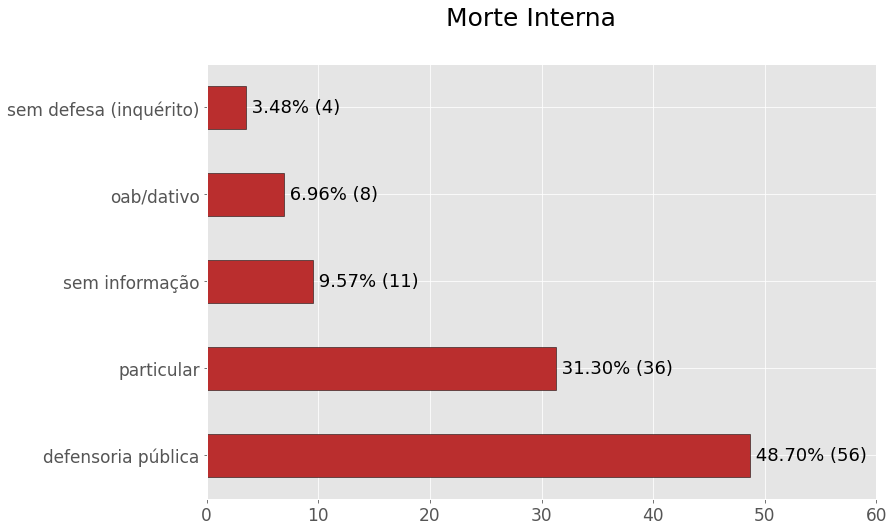

In [14]:
plot, fig = gera_grafico_geral("12 - Defensoria Pública, Adv. Dativo/a ou Particular?", planilha_filtrada_interna, "Morte Interna", x=12, y=8, eixo_y=(0,70,10), fonttamanho=17, fonttitulo=25, fontlabel=18)

loc_geral_variavel_12_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_defensoria_publica_adv_particular_3_caso_interno.png"
fig.savefig(loc_geral_variavel_12_1_3)

In [15]:
## essa parte pega o template na pasta e usando o método DocxTemplate() salvamos o template dentro da variável documento

arq_template = "/content/drive/My Drive/CNJ-mortes/template_tarefa_2.docx" # esse template está na pasta
documento = DocxTemplate(arq_template)

## variável 17

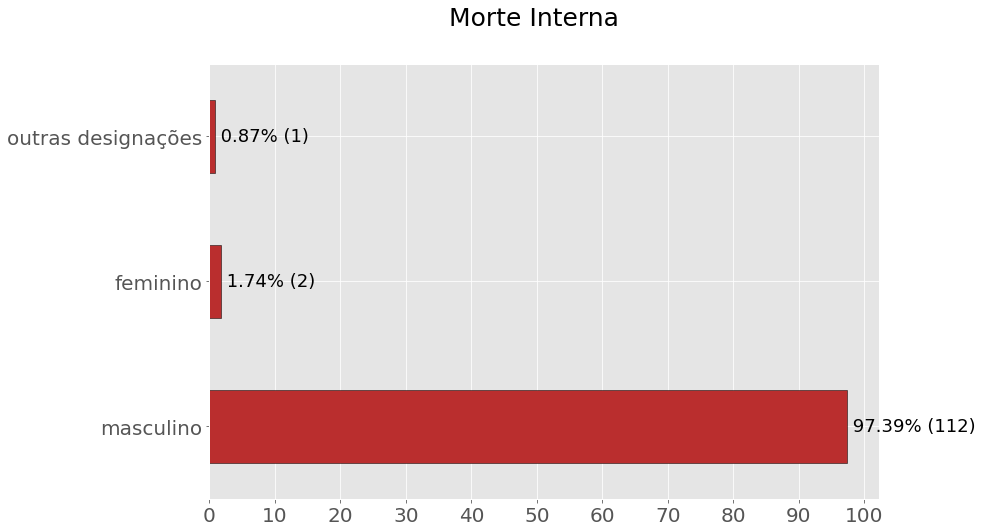

In [16]:
plot, fig = gera_grafico_geral("17 - Gênero", planilha_filtrada_interna, "Morte Interna", eixo_y=(0,110,10),  x=12, y=8, fonttamanho=20, fonttitulo=25, fontlabel=18)

loc_geral_variavel_17_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_genero_3_caso_interno.png"
fig.savefig(loc_geral_variavel_17_1_3)

## 18 - raça

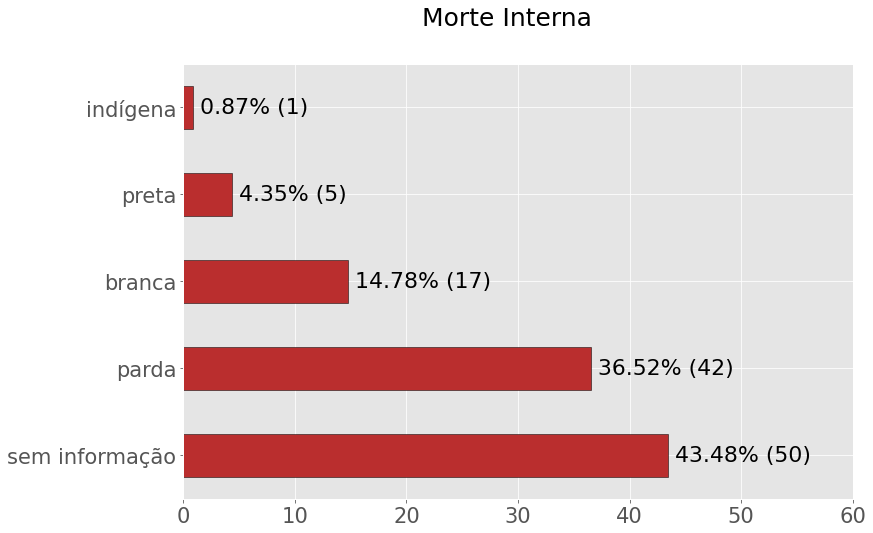

In [17]:
plot, fig = gera_grafico_geral("18 - Raça", planilha_filtrada_interna, "Morte Interna", eixo_y=(0,70,10), fonttamanho=21, fonttitulo=25, fontlabel=22, x =12, y=8)

loc_geral_variavel_18_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_raca_3_caso_interno.png"
fig.savefig(loc_geral_variavel_18_1_3)

## 19 - Nacionalidade

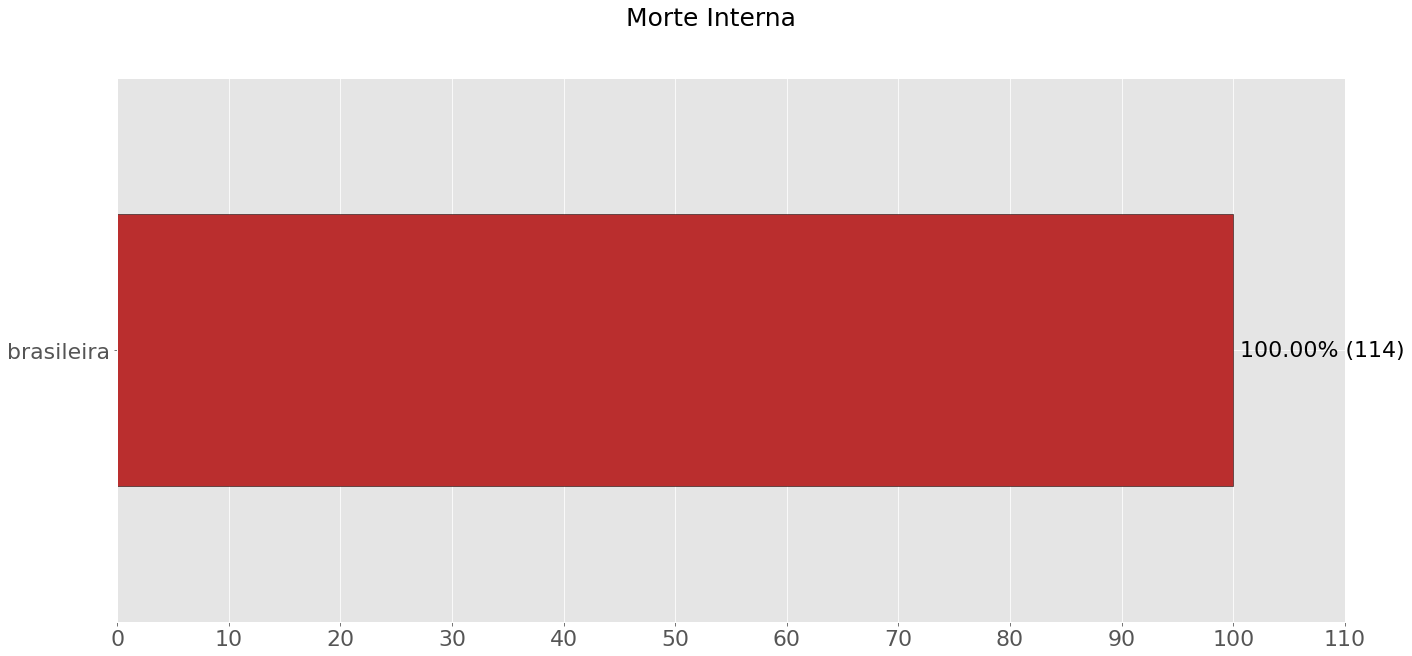

In [18]:
plot, fig = gera_grafico_geral("19 - Nacionalidade", planilha_filtrada_interna, "Morte Interna",  eixo_y=(0,120,10), fonttamanho=22, fonttitulo=25, fontlabel=22)

loc_geral_variavel_19_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_nacionalidade_3_caso_interno.png"
fig.savefig(loc_geral_variavel_19_1_3)

## Tempo de vida em dias

Média geral de dias: 13521.56880733945
Mediana geral de dias: 11327.0


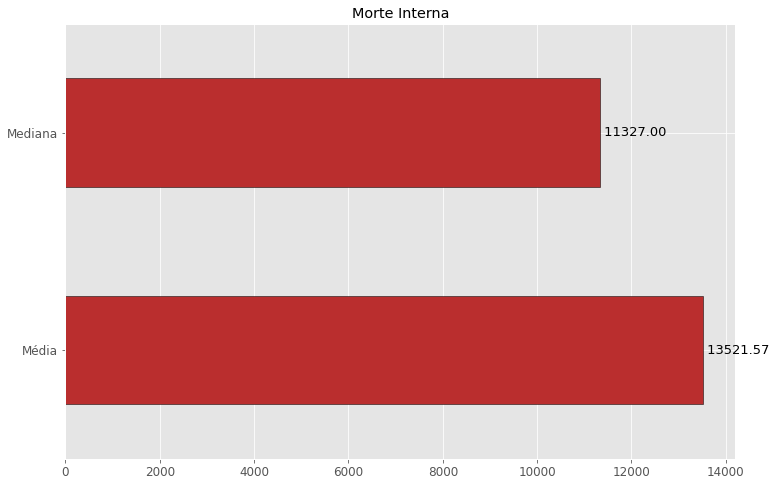

In [19]:
plot, fig = gera_grafico_geral_media("Tempo de vida", planilha_filtrada_interna, "Morte Interna", eixo_y=(0,1600,200), x=12, y=8)

loc_geral_variavel_tempo_vida_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_tempo_vida_3_caso_interno.png"
fig.savefig(loc_geral_variavel_tempo_vida_1_3)

## 23 - Escolaridade

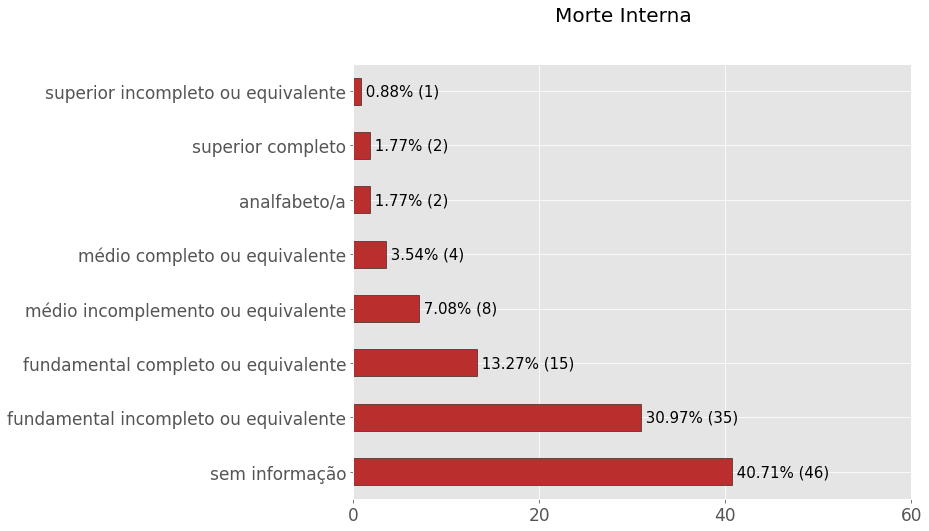

In [20]:
plot, fig = gera_grafico_geral("23 - Escolaridade", planilha_filtrada_interna, "Morte Interna",  eixo_y=(0,80,20), x=10, y=8)

loc_geral_variavel_23_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_escolaridade_3_caso_interno.png"
fig.savefig(loc_geral_variavel_23_1_3)

## Estado Civil

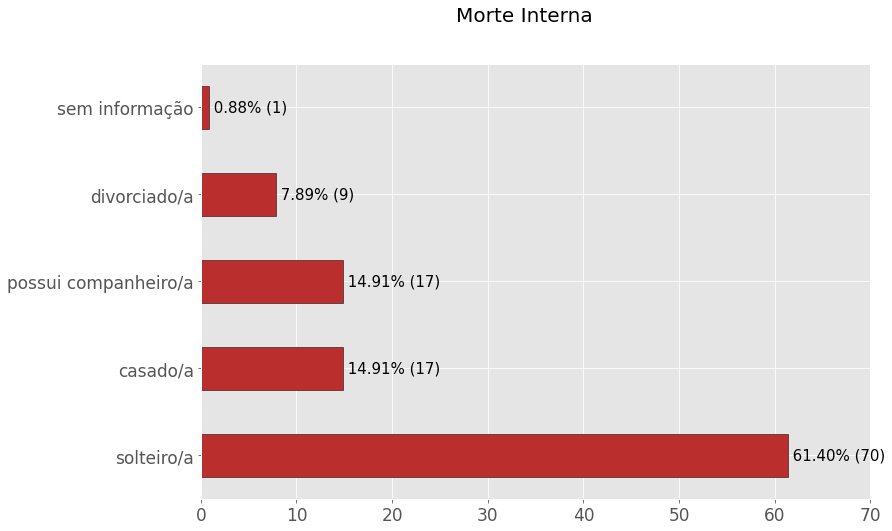

In [21]:
plot, fig = gera_grafico_geral("26 - Estado civil", planilha_filtrada_interna, "Morte Interna", eixo_y=(0,80,10), x =12, y=8)

loc_geral_variavel_26_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_estado_civil_3_caso_interno.png"
fig.savefig(loc_geral_variavel_26_1_3)

### Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")

<ipython-input-22-76d24fda9fc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'] = planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'].astype(str).str.replace("nsa","NSA")
<ipython-input-22-76d24fda9fc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planilha_filtrada_interna['Em caso posi

     quantidade
NSA          79
SI           16
1            12
2             5
3             2
4             1


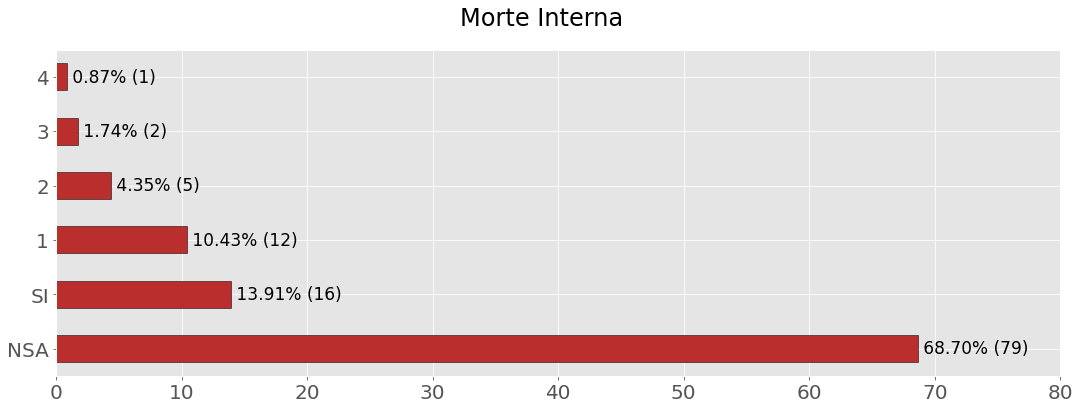

In [22]:
# plot, fig = gera_grafico_geral('Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")', planilha_filtrada_interna, "Morte Interna", eixo_y=(0,80,10))

planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'] = planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'].astype(str).str.replace("nsa","NSA")
planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'] = planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'].astype(str).str.replace("0","NSA")

var_27_aux_interna = planilha_filtrada_interna['Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")'].dropna().value_counts().to_frame()
var_27_aux_interna.rename(columns = {'Em caso positivo, quantos menores de 12 anos (colocar a quantidade numérica ou "NSA" para "não se aplica")': "quantidade"}, inplace = True)
# var_27_aux_interna = var_27_aux_interna.reset_index()
var_27_aux_interna.drop("nan", inplace = True)
print(var_27_aux_interna)
# var_27_aux_interna = var_27_aux_interna.reindex([6,7,8,4,3,1,2,0,5])
# var_27_aux_interna.set_index('index', inplace=True)

var_27_aux_interna['porcentagem'] = var_27_aux_interna['quantidade']/var_27_aux_interna['quantidade'].sum()*100

plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle("Morte Interna", fontsize=24)
var_27_aux_interna['porcentagem'].plot(ax=ax, kind='barh', color=['#ba2e2e'], fontsize= 20, edgecolor="black")
ax.bar_label(ax.containers[0], labels=combine(var_27_aux_interna['quantidade'], var_27_aux_interna['porcentagem']), fontsize=17)
plt.ylabel(None)
plt.xticks(range(0, 90, 10))


loc_geral_variavel_qtd_menor_12_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_qtd_menores_12_3_caso_interno.png"
fig.savefig(loc_geral_variavel_qtd_menor_12_1_3)

### 28 – Maternidade

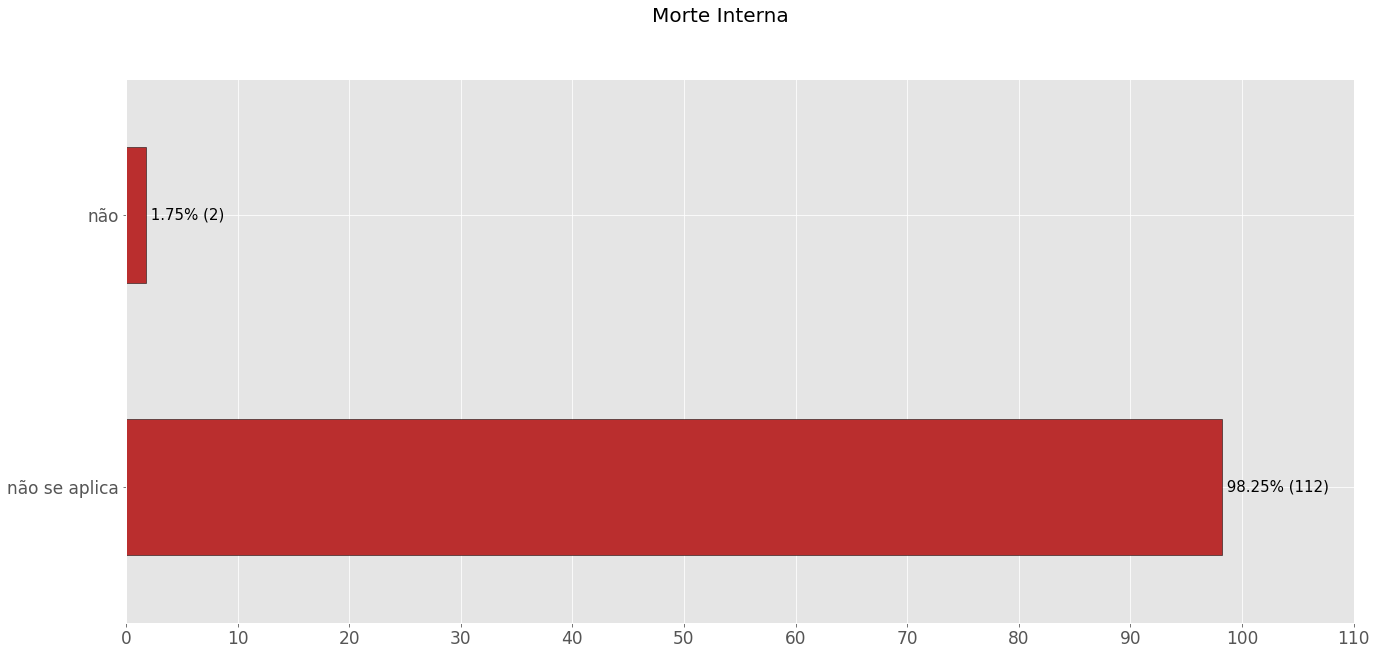

In [23]:
plot, fig = gera_grafico_geral("28 - Maternidade", planilha_filtrada_interna, "Morte Interna",  eixo_y=(0,120,10))

loc_geral_variavel_28_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_maternidade_3_caso_interno.png"
fig.savefig(loc_geral_variavel_28_1_3)

### 32 - A pessoa é reincidente?

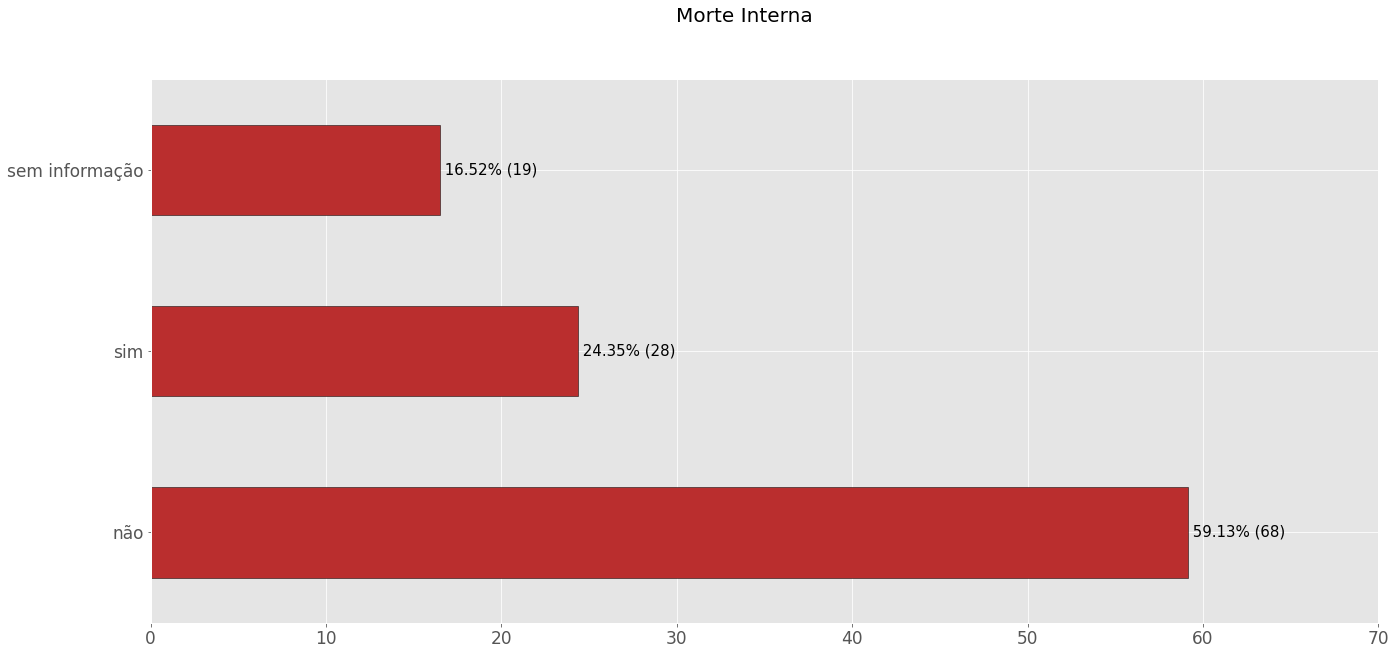

In [24]:
plot, fig = gera_grafico_geral("32 - A pessoa é reincidente?", planilha_filtrada_interna, "Morte Interna", eixo_y=(0,80,10))

loc_geral_variavel_32_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_pessoa_reincidente_3_caso_interno.png"
fig.savefig(loc_geral_variavel_32_1_3)

### 37 - Regime inicial de cumprimento da pena

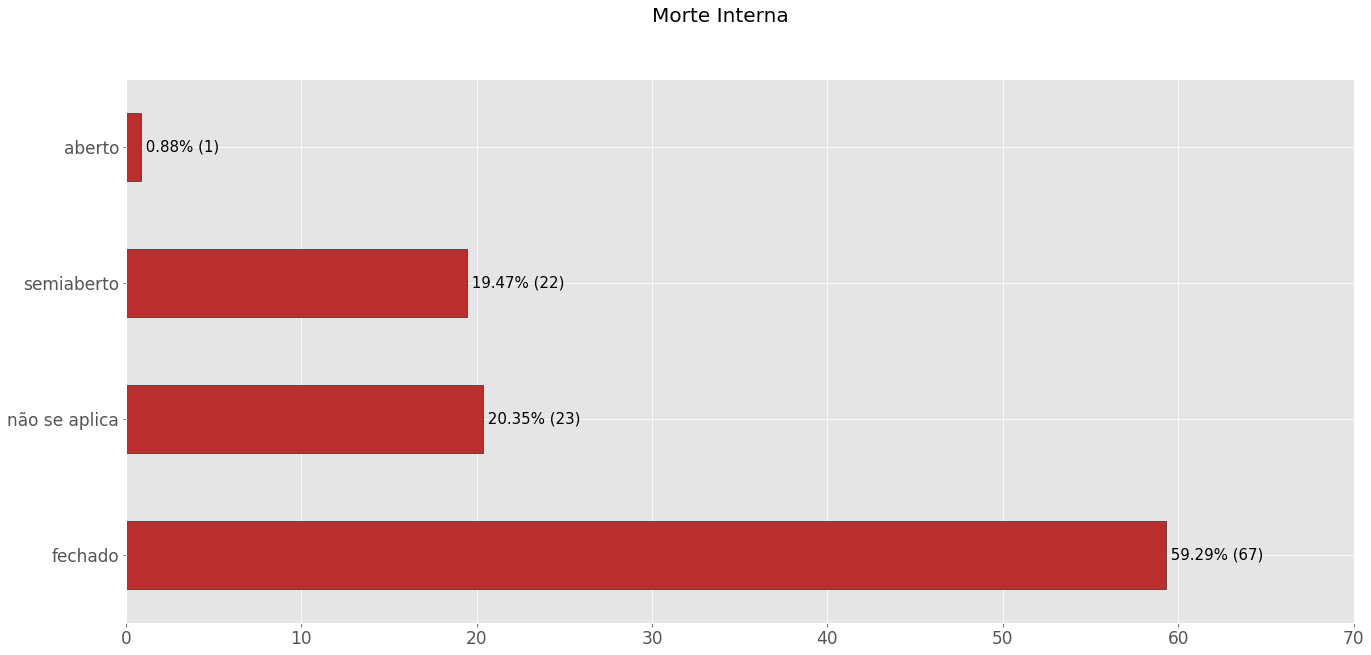

In [25]:
plot, fig = gera_grafico_geral("37 - Regime inicial de cumprimento da pena", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,80,10))

loc_geral_variavel_37_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_regime_inicial_3_caso_interno.png"
fig.savefig(loc_geral_variavel_37_1_3)

### Quantidade de comorbidades

     Quantidade de comorbidades
1.0                          13
3.0                           5
2.0                           3
4.0                           3
5.0                           2
0.0                           1
8.0                           1
7.0                           1
6.0                           1


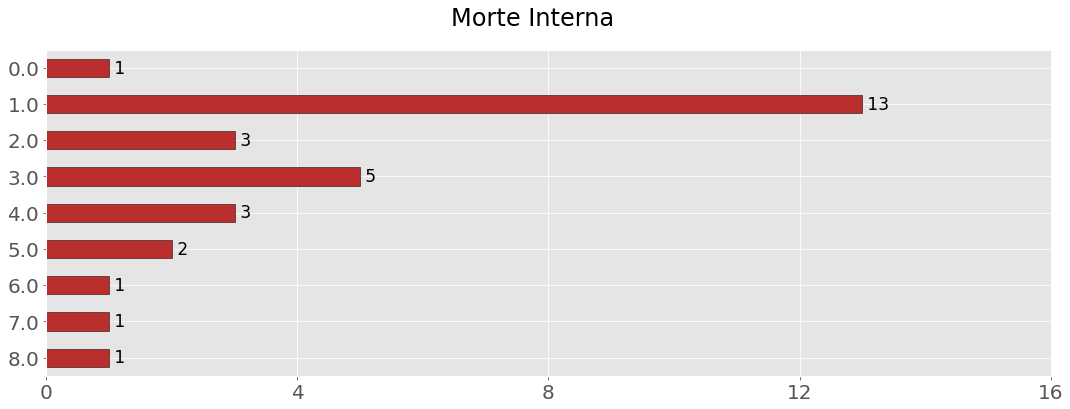

In [58]:
def combine_2(counts):
    fmt = ' {}'.format
    return [fmt(p) for p in counts]

# plot, fig = gera_grafico_geral("Quantidade de comorbidades", planilha_filtrada_interna, "Morte Interna")

var_27_aux_interna = planilha_filtrada_interna["Quantidade de comorbidades"].value_counts().to_frame()
print(var_27_aux_interna)
var_27_aux_interna.rename(columns = {"Quantidade de comorbidades": "quantidade"}, inplace = True)
var_27_aux_interna = var_27_aux_interna.reset_index()
# print(var_27_aux_interna)
var_27_aux_interna = var_27_aux_interna.reindex([6,7,8,4,3,1,2,0,5])
var_27_aux_interna.set_index('index', inplace=True)

# var_27_aux_interna['porcentagem'] = var_27_aux_interna['quantidade']/var_27_aux_interna['quantidade'].sum()*100

plt.style.use(['ggplot'])
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle("Morte Interna", fontsize=24)
var_27_aux_interna['quantidade'].plot(ax=ax, kind='barh', color=['#ba2e2e'], fontsize= 20, edgecolor="black")
ax.bar_label(ax.containers[0], labels= combine_2(var_27_aux_interna['quantidade']), fontsize=17)
plt.ylabel(None)
plt.xticks(range(0, 20, 4))

loc_geral_variavel_qtd_comorbidades_1_3 = "/content/drive/My Drive/CNJ-mortes/imagens_graficos/3/grafico_qtd_comorbidades_3_caso_interno.png"
fig.savefig(loc_geral_variavel_qtd_comorbidades_1_3)

### Tempo de pena da sentença (em dias)

[5413.0, nan, nan, nan, 1095.0, 2735.0, 5290.0, 3100.0, nan, 3160.0, 3830.0, 5290.0, 6935.0, 2845.0, 4307.0, 3390.0, 1945.0, 3650.0, 2555.0, 6325.0, 6840.0, nan, 1945.0, 2158.0, nan, 1945.0, 1886.0, nan, 5475.0, nan, 5215.0, 2190.0, 2430.0, 2190.0, 6445.0, 2660.0, 4710.0, 5254.0, nan, nan, nan, nan, 3248.0, 1825.0, 2125.0, nan, nan, 2190.0, nan, 3935.0, 5110.0, 6385.0, nan, 184.0, 4360.0, 2960.0, nan, 4597.0, 1215.0, nan, nan, 1030.0, 13787.0, nan, nan, 2795.0, 5475.0, 2920.0, 4775.0, 2370.0, 2190.0, 3650.0, 1670.0, 2555.0, 4135.0, 2920.0, 6935.0, 1945.0, nan, 5110.0, 5804.0, 14720.0, nan, 2125.0, 4380.0, 1030.0, 6570.0, 1460.0, 2555.0, 1735.0, 3240.0, nan, 1700.0, 730.0, 6385.0, 2555.0, 2190.0, 3040.0, 3160.0, 2847.0, 4380.0, 3190.0, 10705.0, nan, 442.0, nan, 4325.0, 6670.0, nan, 2480.0, 485.0, 873.0, 4675.0, 485.0, 810.0, 5065.0]
[5413, 1095, 2735, 5290, 3100, 3160, 3830, 5290, 6935, 2845, 4307, 3390, 1945, 3650, 2555, 6325, 6840, 1945, 2158, 1945, 1886, 5475, 5215, 2190, 2430, 2190,

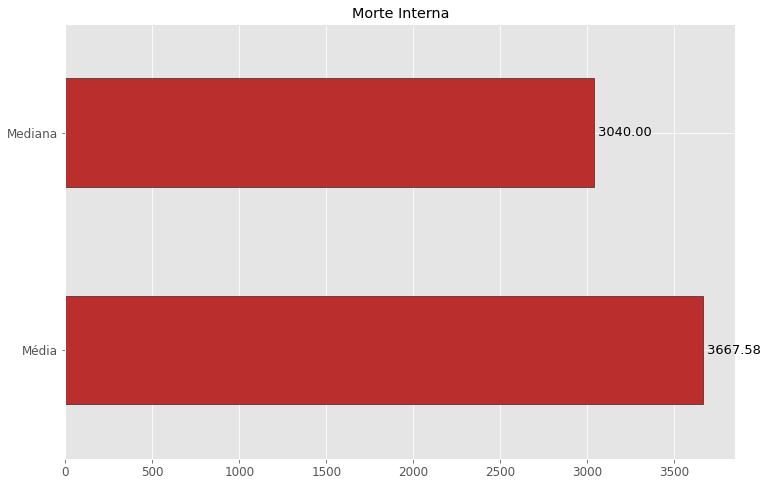

In [28]:
# print(planilha_filtrada_interna["Tempo de pena da sentença (em dias)"])

vlrs = planilha_filtrada_interna["Tempo de pena da sentença (em dias)"].to_list()
print(vlrs)

vlr_md =[]
for val in vlrs:
  if str(val) != "nan":
    val = int(float(val))
    vlr_md.append(val)

print(vlr_md)


planilha_filtrada_interna_2 = pd.DataFrame()
planilha_filtrada_interna_2["Tempo de pena da sentença (em dias)"] = vlr_md

# print(planilha_filtrada_externa_2["Tempo de pena da sentença (em dias)"])



plot, fig =  gera_grafico_geral_media('Tempo de pena da sentença (em dias)', planilha_filtrada_interna_2, "Morte Interna")

184
14720
89
           index  quantidade
0    1460 a 2190          17
1    2190 a 2920          14
2    2920 a 3650          11
3    3650 a 4380           8
4     730 a 1460           7
5    4380 a 5110           7
6    5110 a 5840           7
7  acima de 6570           7
8    5840 a 6570           6
9        1 a 730           5


Text(0, 0.5, '')

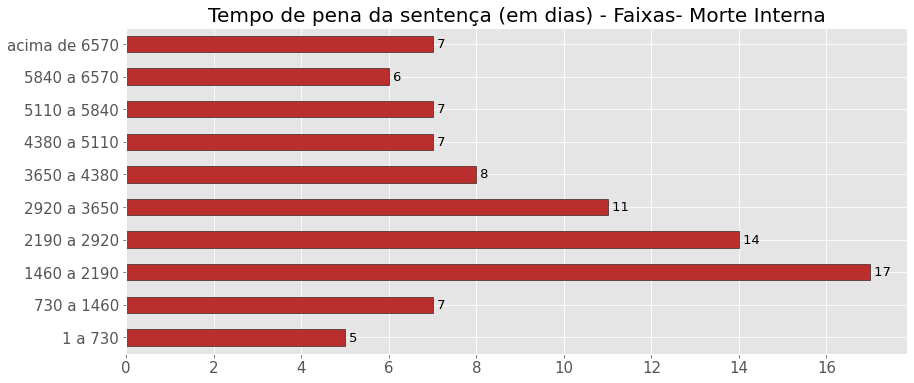

In [29]:
print(planilha_filtrada_interna_2["Tempo de pena da sentença (em dias)"].min())
print(planilha_filtrada_interna_2["Tempo de pena da sentença (em dias)"].max())

faixas = ["1 a 730", "730 a 1460", "1460 a 2190", "2190 a 2920", "2920 a 3650", "3650 a 4380", "4380 a 5110", "5110 a 5840","5840 a 6570","acima de 6570"]
planilha_filtrada_interna_2["Tempo de pena da sentença (em dias) - Faixas"] = pd.cut(x=planilha_filtrada_interna_2["Tempo de pena da sentença (em dias)"], bins=[0,730,1460,2190,2920,3650,4380,5110,5580,6570,14720], labels=faixas)


var_27_aux_faixas_renda_externa = planilha_filtrada_interna_2["Tempo de pena da sentença (em dias) - Faixas"].value_counts().to_frame()
# print(var_27_aux_faixas_renda_externa)

var_27_aux_faixas_renda_externa.rename(columns = {"Tempo de pena da sentença (em dias) - Faixas": "quantidade"}, inplace = True)

print(var_27_aux_faixas_renda_externa["quantidade"].sum())
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reset_index()
print(var_27_aux_faixas_renda_externa)
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reindex([9,4,0,1,2,3,5,6,8,7])
var_27_aux_faixas_renda_externa.set_index('index', inplace=True)
# print(var_27_aux_faixas_renda_externa)

labels_value_counts_renda_morte_externa = [' {}'.format(i[0]) for i in var_27_aux_faixas_renda_externa.values]
# print(labels_value_counts_renda_morte_externa)

plt.style.use(['ggplot'])
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(14,6))
ax.set_title("Tempo de pena da sentença (em dias) - Faixas- Morte Interna", fontsize=20)
var_27_aux_faixas_renda_externa['quantidade'].plot(ax=ax, kind='barh', color=["#ba2e2e"], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=labels_value_counts_renda_morte_externa, fontsize=13)
plt.xticks(range(0, max(var_27_aux_faixas_renda_externa['quantidade'].values)+1, 2))
plt.ylabel(None)



## 36

[7300, 1095, 5290, 3160, 9236, 3650, 6840, 4065, 1945, 6935, 2660, 4710, 3860, 6415, 2190, 3935, 2960, 2520, 13787, 4015, 3650, 6000, 14720, 7860, 11375, 1465, 10705, 442, 4325, 485, 1202, 485, 810]
Média geral de dias: 4851.272727272727
Mediana geral de dias: 3935.0


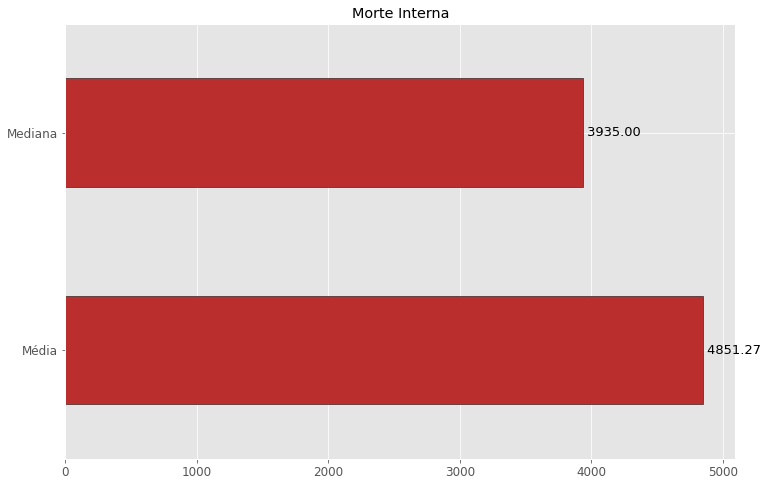

In [30]:
vlrs = planilha_filtrada_interna["Tempo total de pena"].to_list()

vlr_md =[]
for val in vlrs:
  if str(val) != "nan":
    val = int(float(val))
    vlr_md.append(val)

print(vlr_md)



planilha_filtrada_interna_2 = pd.DataFrame()
planilha_filtrada_interna_2["Tempo total de pena"] = vlr_md

# print(planilha_filtrada_externa_2["Tempo de pena da sentença (em dias)"])



plot, fig =  gera_grafico_geral_media('Tempo total de pena', planilha_filtrada_interna_2, "Morte Interna")

442
14720
           index  quantidade
0  acima de 6570           9
1    3650 a 4380           5
2    2920 a 3650           4
3        1 a 730           3
4     730 a 1460           3
5    1460 a 2190           3
6    2190 a 2920           2
7    5840 a 6570           2
8    4380 a 5110           1
9    5110 a 5840           1


Text(0, 0.5, '')

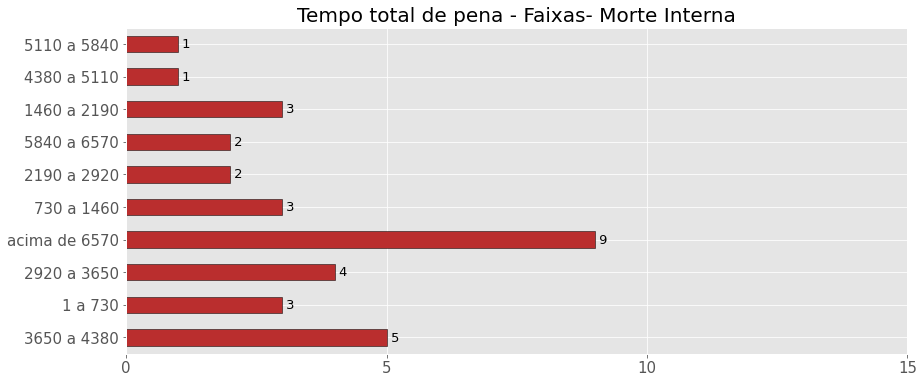

In [31]:
print(planilha_filtrada_interna_2['Tempo total de pena'].min())
print(planilha_filtrada_interna_2['Tempo total de pena'].max())


faixas = ["1 a 730", "730 a 1460", "1460 a 2190", "2190 a 2920", "2920 a 3650", "3650 a 4380", "4380 a 5110", "5110 a 5840","5840 a 6570","acima de 6570"]
planilha_filtrada_interna_2['Tempo total de pena - Faixas'] = pd.cut(x=planilha_filtrada_interna_2['Tempo total de pena'], bins=[0,730,1460,2190,2920,3650,4380,5110,5580,6570,41485], labels=faixas)


var_27_aux_faixas_renda_externa = planilha_filtrada_interna_2['Tempo total de pena - Faixas'].value_counts().to_frame()
# print(var_27_aux_faixas_renda_externa)

var_27_aux_faixas_renda_externa.rename(columns = {"Tempo total de pena - Faixas": "quantidade"}, inplace = True)

# print(var_27_aux_faixas_renda_externa)

# print(var_27_aux_faixas_renda_externa["quantidade"].sum())
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reset_index()
print(var_27_aux_faixas_renda_externa)
var_27_aux_faixas_renda_externa = var_27_aux_faixas_renda_externa.reindex([1,3,2,0,4,6,7,5,8,9])
var_27_aux_faixas_renda_externa.set_index('index', inplace=True)
# print(var_27_aux_faixas_renda_externa)

labels_value_counts_renda_morte_externa = [' {}'.format(i[0]) for i in var_27_aux_faixas_renda_externa.values]
# print(labels_value_counts_renda_morte_externa)

plt.style.use(['ggplot'])
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(14,6))
ax.set_title("Tempo total de pena - Faixas- Morte Interna", fontsize=20)
var_27_aux_faixas_renda_externa['quantidade'].plot(ax=ax, kind='barh', color=["#ba2e2e"], fontsize=15, edgecolor="black")
ax.bar_label(ax.containers[0], labels=labels_value_counts_renda_morte_externa, fontsize=13)
plt.xticks(range(0, 20, 5))
plt.ylabel(None)

## 21 - Informação sobre residência, local de moradia e/ou situação de rua

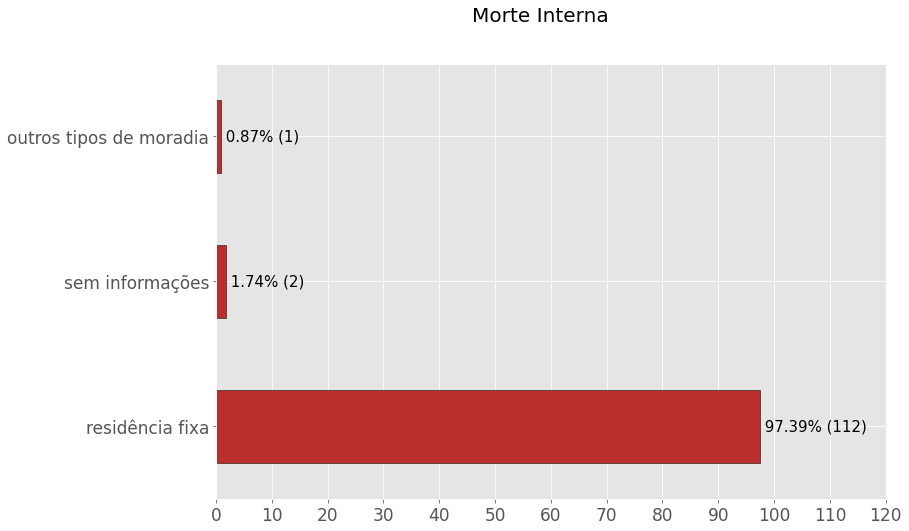

In [32]:
plot, fig = gera_grafico_geral("21 - Informação sobre residência, local de moradia e/ou situação de rua", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,130,10), x = 12, y =8)

51 - Onde ocorreu o óbito? (Unidade prisional, unidade de saúde ou na rua) (codificada)

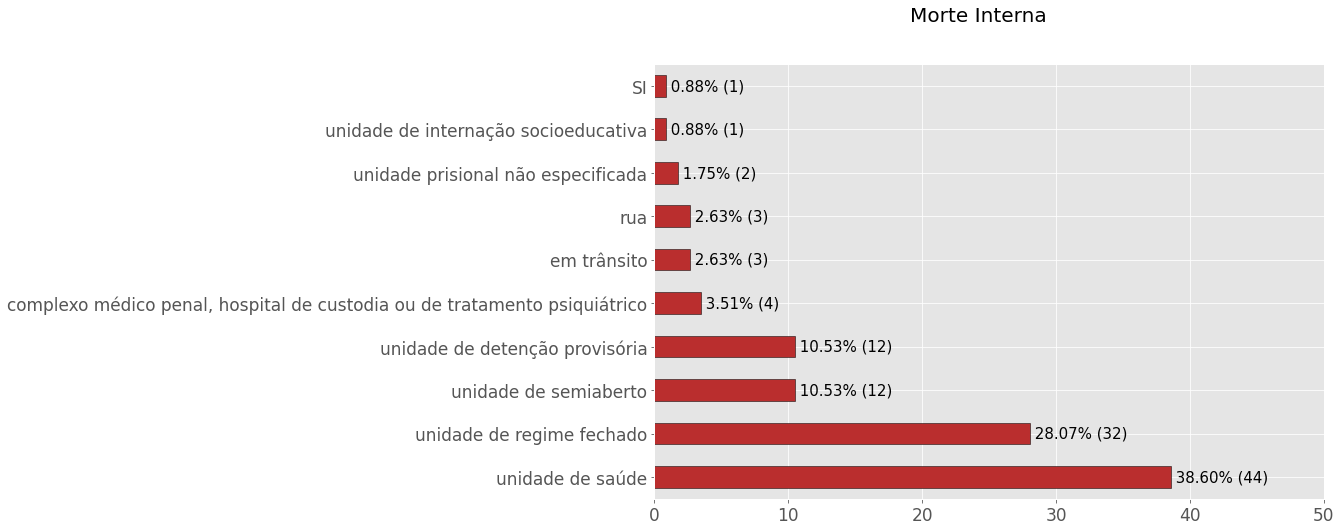

In [33]:
plot, fig = gera_grafico_geral("51 - codificada", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,60,10), x = 12, y =8)

## 38 - Em que regime ou sob que mecanismos de vigilância estava a pessoa na data da morte? (codificada)

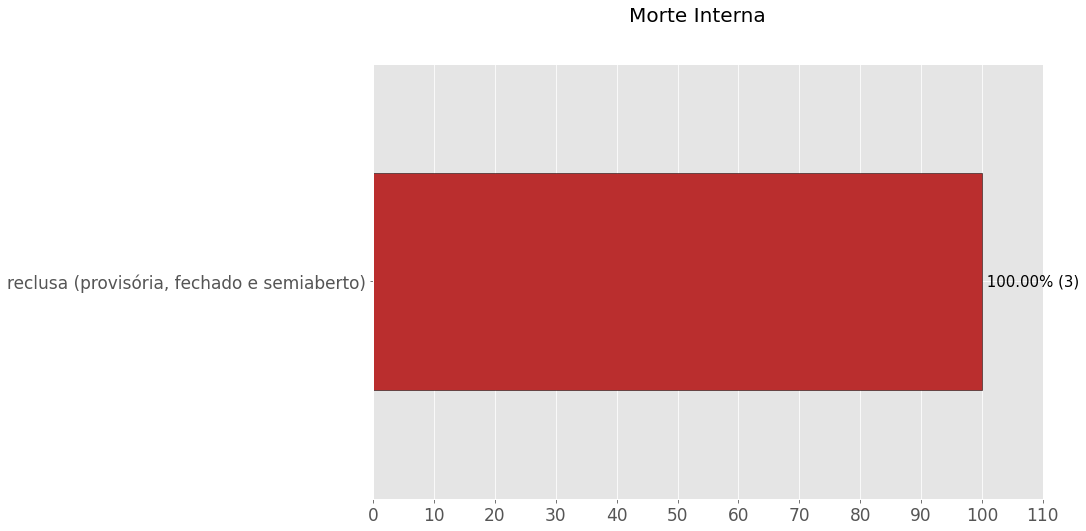

In [41]:
planilha_filtrada_interna_2["38 - codificada"] = planilha_filtrada_interna["38 - codificada"]

planilha_filtrada_interna_2["38 - codificada"] =np.where(planilha_filtrada_interna_2["38 - codificada"] == 'cumprindo pena privativa de liberdade', 'reclusa (provisória, fechado e semiaberto)',planilha_filtrada_interna_2["38 - codificada"])
planilha_filtrada_interna_2["38 - codificada"] =np.where(planilha_filtrada_interna_2["38 - codificada"] == 'semiaberto', 'reclusa (provisória, fechado e semiaberto)',planilha_filtrada_interna_2["38 - codificada"])


plot, fig = gera_grafico_geral("38 - codificada", planilha_filtrada_interna_2, "Morte Interna",eixo_y=(0,120,10), x = 12, y =8)

## 41 - Caso a pessoa estivesse presa no momento da morte: a pessoa presa estava cumprindo pena decorrente de sentença transitada em julgado ou se preso processualmente? (Codificada)

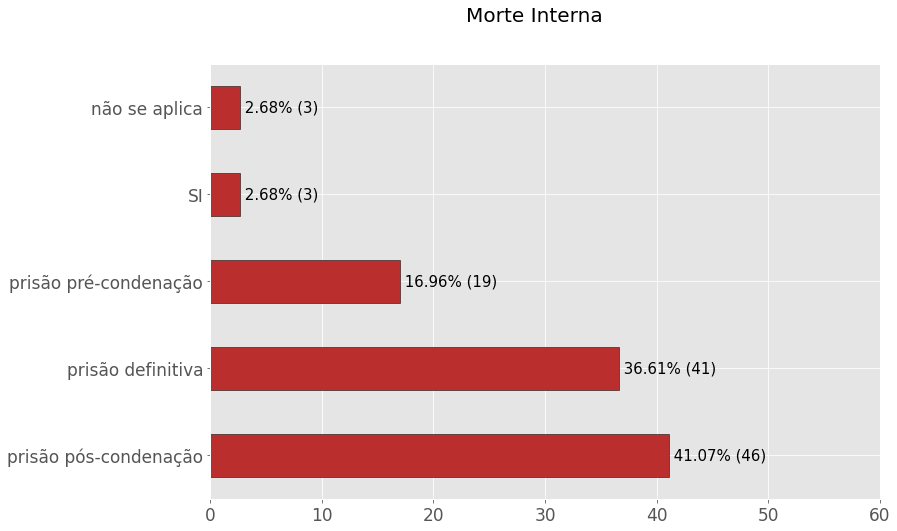

In [35]:
plot, fig = gera_grafico_geral("41 - codificada", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,70,10), x = 12, y =8)

## 24 - Profissão

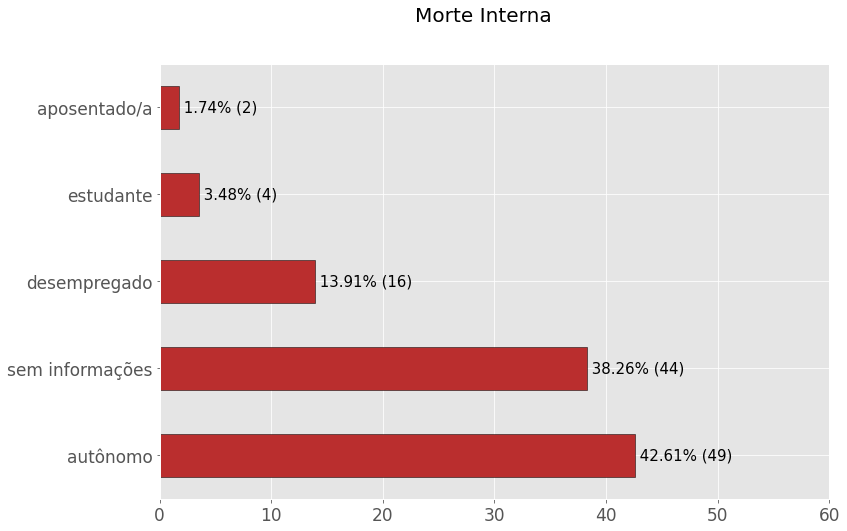

In [36]:
plot, fig = gera_grafico_geral("24 - codificada", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,70,10), x = 12, y =8)

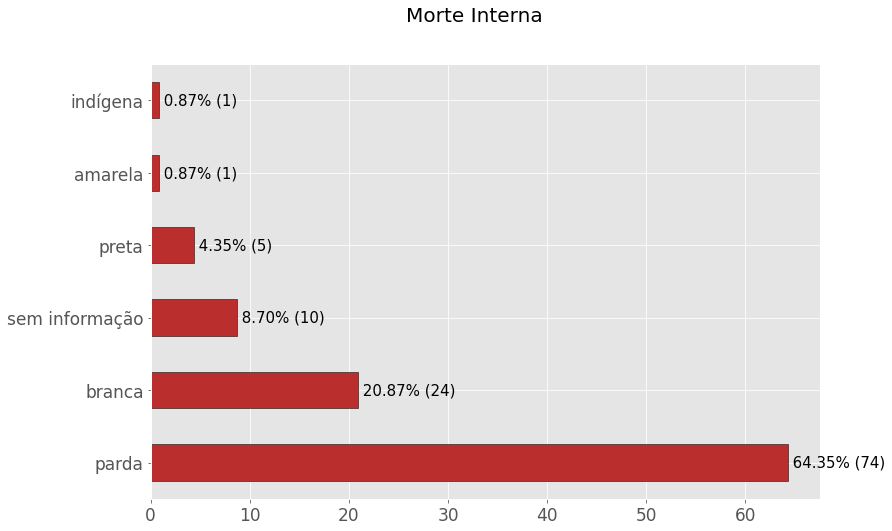

In [37]:
plot, fig = gera_grafico_geral("75 - Identificação racial ao fim do processo", planilha_filtrada_interna, "Morte Interna",eixo_y=(0,70,10), x = 12, y =8)

In [38]:
## gráficos tópico 3

grafico_variavel_12_3 = InlineImage(documento, loc_geral_variavel_12_1_3, Cm(16))
grafico_variavel_17_3 = InlineImage(documento, loc_geral_variavel_17_1_3, Cm(16))
grafico_variavel_18_3 = InlineImage(documento, loc_geral_variavel_18_1_3, Cm(16))
grafico_variavel_19_3 = InlineImage(documento, loc_geral_variavel_19_1_3, Cm(16))
grafico_variavel_tempo_vida_3 = InlineImage(documento, loc_geral_variavel_tempo_vida_1_3, Cm(16))
grafico_variavel_qtd_comorbidades_3 = InlineImage(documento, loc_geral_variavel_qtd_comorbidades_1_3, Cm(16))
grafico_variavel_23_3 = InlineImage(documento, loc_geral_variavel_23_1_3, Cm(16))
grafico_variavel_26_3 = InlineImage(documento, loc_geral_variavel_26_1_3, Cm(16))
# grafico_variavel_27_3 = InlineImage(documento, loc_geral_variavel_27_1_3, Cm(16)) # filhos de novo
grafico_variavel_qtd_menor_12_3 = InlineImage(documento, loc_geral_variavel_qtd_menor_12_1_3, Cm(16))
grafico_variavel_28_3 = InlineImage(documento, loc_geral_variavel_28_1_3, Cm(16))
# # grafico_variavel_renda_tratada_3 = InlineImage(documento, loc_geral_variavel_renda_tratada_1_3, Cm(16))
# grafico_variavel_30_3 = InlineImage(documento, loc_geral_variavel_30_1_3, Cm(16))
# grafico_variavel_31_3 = InlineImage(documento, loc_geral_variavel_31_1_3, Cm(16))
grafico_variavel_32_3 = InlineImage(documento, loc_geral_variavel_32_1_3, Cm(16))
grafico_variavel_37_3 = InlineImage(documento, loc_geral_variavel_37_1_3, Cm(16))
# # grafico_variavel_tempo_pena_sentenca_3 = InlineImage(documento, loc_geral_variavel_tempo_pena_sentenca_1_3, Cm(16))
# # grafico_variavel_tempo_total_pena_3 = InlineImage(documento, loc_geral_variavel_tempo_total_pena_1_3, Cm(16))


In [39]:
contexto = {

    'variavel_12_grafico_interna': grafico_variavel_12_3,
    'variavel_17_grafico_interna': grafico_variavel_17_3,
    'variavel_18_grafico_interna': grafico_variavel_18_3,
    'variavel_19_grafico_interna': grafico_variavel_19_3,
    'variavel_tempo_vida_grafico_interna': grafico_variavel_tempo_vida_3,
    'variavel_quantidade_comorbidades_grafico_interna': grafico_variavel_qtd_comorbidades_3,
    'variavel_23_grafico_interna': grafico_variavel_23_3,
    'variavel_26_grafico_interna': grafico_variavel_26_3,
    # 'variavel_27_grafico_interna': grafico_variavel_27_3,
    'variavel_menores_12_anos_grafico_interna': grafico_variavel_qtd_menor_12_3,
    # # 'variavel_renda_per_capita_grafico_interna': ,
    'variavel_28_grafico_interna': grafico_variavel_28_3,
    # # 'variavel_renda_grafico_interna': ,
    # 'variavel_30_grafico_interna': grafico_variavel_30_3,
    # 'variavel_31_grafico_interna': grafico_variavel_31_3,
    'variavel_32_grafico_interna': grafico_variavel_32_3,
    'variavel_37_grafico_interna': grafico_variavel_37_3
    # # 'variavel_tempo_pena_sentenca_grafico_interna': ,
    # # 'variavel_tempo_total_pena_grafico_interna': 
}

In [40]:
# Geramos o documento, substituindo as variaveis do template pelos valores do contexto
documento.render(contexto)

# Salvamos o documento que era o template com os gráficos inseridos
documento.save("/content/drive/My Drive/CNJ-mortes//relatorio_final.docx")